In [1]:
import matplotlib.pyplot as plt
import os
from reading_util import *

In [2]:
input_dir = '/eos/project/d/dshep/TOPCLASS/DijetAnomaly/VAE_data/split_by_jet1_pt/qcd_sqrtshatTeV_13TeV_PU40_SIDEBAND'
file_name = 'qcd_SIDEBAND_concat_mjj_over_1100_ptj1_under_1000_events.h5'
file = h5py.File( os.path.join( input_dir, file_name ), 'r')
print(file.keys())

<KeysViewHDF5 ['eventFeatureNames', 'eventFeatures', 'jetConstituentsList', 'particleFeatureNames']>


In [3]:
jet_const = np.array( file.get('jetConstituentsList') )
print('num events = ', jet_const.shape )

num events =  (3400838, 2, 100, 3)


In [4]:
jet_feature_names = np.array( file.get('eventFeatureNames'))
jet_feature = np.array( file.get('eventFeatures') )
print(jet_feature_names)
particle_feature_names = np.array( file.get('particleFeatureNames') )
print( particle_feature_names )
print( len(file.get('eventFeatureNames')) )

[b'mJJ' b'j1Pt' b'j1Eta' b'j1Phi' b'j1M' b'j1E' b'j2Pt' b'j2M' b'j2E'
 b'DeltaEtaJJ' b'DeltaPhiJJ']
[b'pEta' b'pPhi' b'pPt']
11


(array([6., 0., 0., 1., 2., 0., 0., 1., 0., 1.]),
 array([ -3.07281119,  56.11588493, 115.30458105, 174.49327717,
        233.68197329, 292.87066941, 352.05936553, 411.24806165,
        470.43675777, 529.62545389, 588.81415001]),
 <a list of 10 Patch objects>)

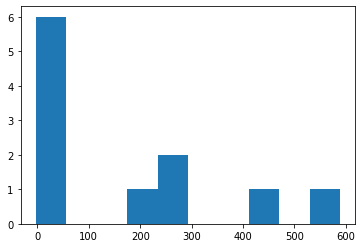

In [5]:
plt.hist(jet_feature[:,0])

In [6]:
np.sum( jet_feature[0] > 1100)

0

In [7]:
from reading_util import *
jet_const_pt1_over, jet_feat_pt1_over, jet_const_pt1_under, jet_feat_pt1_under, keys = read_dijet_events_and_features( input_dir )

[--------------------]  0%3881  events read,  1721  events passed mass cut (size =  8260.8  KB)
[--------------------]  0% - ETA: 27.4 h   395682  events read,  172381  events passed mass cut (size =  827428.8  KB)
[--------------------]  0% - ETA: 38.1 h   786747  events read,  343564  events passed mass cut (size =  1649107.2  KB)
[--------------------]  0% - ETA: 49.9 h   1178485  events read,  515219  events passed mass cut (size =  2473051.2  KB)
[--------------------]  0% - ETA: 61.4 h   1569340  events read,  685930  events passed mass cut (size =  3292464.0  KB)
[--------------------]  0% - ETA: 73.1 h   1960356  events read,  856195  events passed mass cut (size =  4109736.0  KB)
[--------------------]  0% - ETA: 84.8 h   2353008  events read,  1027561  events passed mass cut (size =  4932292.8  KB)
[--------------------]  0% - ETA: 96.6 h   2744615  events read,  1198466  events passed mass cut (size =  5752636.8  KB)
[--------------------]  0% - ETA:108.7 h   3135147  events

7108


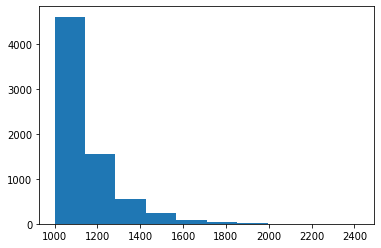

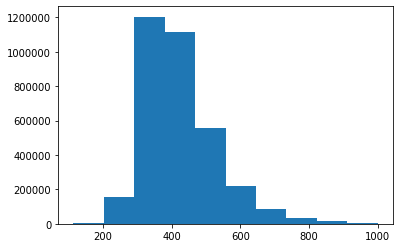

In [14]:
plt.hist(jet_feat_pt1_over[:,1])
plt.figure()
plt.hist(jet_feat_pt1_under[:,1])
print(jet_feat_pt1_over.shape[0])

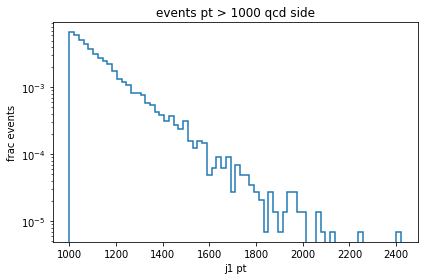

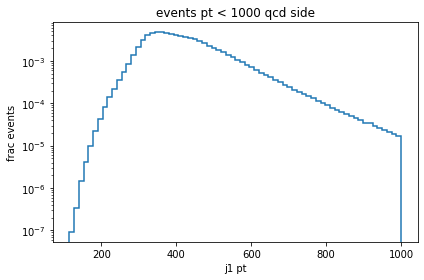

In [12]:
from plotting_util import *
plot_hist(jet_feat_pt1_over[:,1],'j1 pt', 'frac events', 'events pt > 1000 qcd side')
plot_hist(jet_feat_pt1_under[:,1],'j1 pt', 'frac events', 'events pt < 1000 qcd side')

In [15]:
output_dir = '/eos/project/d/dshep/TOPCLASS/DijetAnomaly/VAE_data/split_by_jet1_pt/qcd_sqrtshatTeV_13TeV_PU40_SIDEBAND'
output_file_name_pt1_over = 'qcd_SIDEBAND_concat_mjj_over_1100_ptj1_over_1000_events.h5'
output_file_name_pt1_under = 'qcd_SIDEBAND_concat_mjj_over_1100_ptj1_under_1000_events.h5'
output_file_pt_over = os.path.join(output_dir,output_file_name_pt1_over)
output_file_pt_under = os.path.join(output_dir,output_file_name_pt1_under)
output_file_pt_over = h5py.File(output_file_pt_over,'w')
output_file_pt_under = h5py.File(output_file_pt_under,'w')

In [17]:
print(jet_feature_names)
print( particle_feature_names )

[b'mJJ' b'j1Pt' b'j1Eta' b'j1Phi' b'j1M' b'j1E' b'j2Pt' b'j2M' b'j2E'
 b'DeltaEtaJJ' b'DeltaPhiJJ']
[b'pEta' b'pPhi' b'pPt']


In [18]:
print('num events ptj1 > 1000: ', jet_const_pt1_over.shape[0])
print('num events ptj1 <= 1000: ', jet_const_pt1_under.shape[0])

7108
3400838


In [19]:
output_file_pt_over.create_dataset('eventFeatureNames', data=jet_feature_names)
output_file_pt_over.create_dataset('eventFeatures', data=jet_feat_pt1_over, compression='gzip')
output_file_pt_over.create_dataset('particleFeatureNames', data=particle_feature_names)
output_file_pt_over.create_dataset('jetConstituentsList',data=jet_const_pt1_over, compression='gzip')
output_file_pt_over.close()

<HDF5 dataset "jetConstituentsList": shape (7108, 2, 100, 3), type "<f8">

In [20]:
output_file_pt_under.create_dataset('eventFeatureNames', data=jet_feature_names)
output_file_pt_under.create_dataset('eventFeatures', data=jet_feat_pt1_under, compression='gzip')
output_file_pt_under.create_dataset('particleFeatureNames', data=particle_feature_names)
output_file_pt_under.create_dataset('jetConstituentsList',data=jet_const_pt1_under, compression='gzip')
output_file_pt_under.close()

<HDF5 dataset "jetConstituentsList": shape (3400838, 2, 100, 3), type "<f8">

# test files written

In [22]:
output_file_pt_over = os.path.join(output_dir,output_file_name_pt1_over)
output_file_pt_under = os.path.join(output_dir,output_file_name_pt1_under)
output_file_pt_over = h5py.File(output_file_pt_over,'r')
output_file_pt_under = h5py.File(output_file_pt_under,'r')

In [23]:
features_pt_over = output_file_pt_over.get('eventFeatures')
features_pt_under = output_file_pt_under.get('eventFeatures')

7108
3400838


(array([   3482.,  154174., 1204273., 1115099.,  559987.,  219767.,
          85843.,   35497.,   15392.,    7324.]),
 array([114.67567444, 203.20736237, 291.73905029, 380.27073822,
        468.80242615, 557.33411407, 645.865802  , 734.39748993,
        822.92917786, 911.46086578, 999.99255371]),
 <a list of 10 Patch objects>)

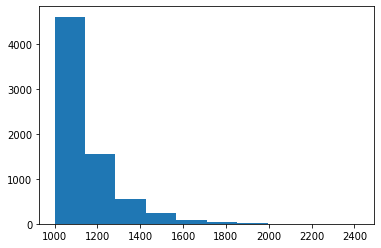

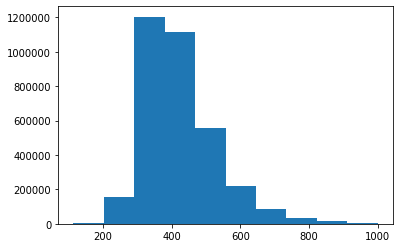

In [24]:
print(jet_feat_pt1_over.shape[0])
print(jet_feat_pt1_under.shape[0])
plt.hist(jet_feat_pt1_over[:,1])
plt.figure()
plt.hist(jet_feat_pt1_under[:,1])
